# Unsupervised Learning 

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
# Displaying first few rows
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(150, 4)

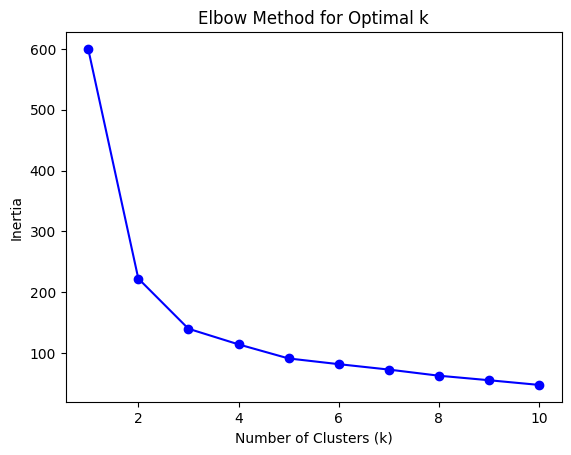

In [5]:
# Using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### Three clusters found

In [6]:
# Applying K-Means clustering with k=3

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
X['Cluster'] = kmeans.fit_predict(X_scaled)


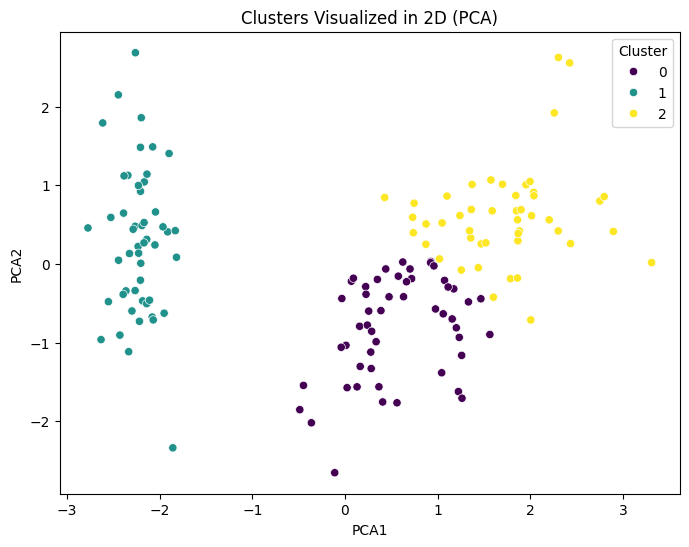

In [7]:
# Visualizing Clusters in 2D (PCA)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X['PCA1'] = X_pca[:, 0]
X['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=X, palette='viridis')
plt.title('Clusters Visualized in 2D (PCA)')
plt.show()


In [8]:
# Computing average values per cluster
cluster_summary = X.groupby('Cluster').mean()
print("Cluster Summary (mean values):")
print(cluster_summary)


Cluster Summary (mean values):
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 5.801887          2.673585           4.369811   
1                 5.006000          3.428000           1.462000   
2                 6.780851          3.095745           5.510638   

         petal width (cm)      PCA1      PCA2  
Cluster                                        
0                1.413208  0.572621 -0.807209  
1                0.246000 -2.224753  0.288927  
2                1.972340  1.721037  0.602887  


In [ ]:
pd.crosstab(iris.target, X['Cluster'])
